In [ ]:
# Importamos las librerías necesarias:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Cargamos la base de datos:

df = pd.read_csv('Social_Media_Emotion.csv')

In [ ]:
# Creamos la función del EDA:

def eda_basico(df):

    print('🌷Ejemplo de datos del DF:')
    display(df.head(3))
    display(df.tail(3))
    display(df.sample(3))
    print('________________________________________________________________________________________________________')

    print('🌻Número de Filas:')
    display(df.shape[0])
    print('________________________________________________________________________________________________________')

    print('🌱Número de Columnas:')
    display(df.shape[1])
    print('________________________________________________________________________________________________________')

    print('🌼Información de la tabla:')
    display(df.info())
    print('________________________________________________________________________________________________________')

    print('🌑Nombre de las columnas:')
    display(df.columns)
    print('________________________________________________________________________________________________________')

    print('🍄Descripción de los datos numéricos:')
    num_cols = df.select_dtypes(include=['number'])
    if not num_cols.empty:
        display(num_cols.describe().T)
    else:
        print('⚠️ No hay columnas numéricas en el DataFrame.')
    print('________________________________________________________________________________________________________')

    print('🌋Descripción de los datos no-numéricos:')
    cat_cols = df.select_dtypes(include='object')
    if not cat_cols.empty:
        display(cat_cols.describe(include='object').T)
    else:
        print('⚠️ No hay columnas categóricas (tipo object) en el DataFrame.')
    print('________________________________________________________________________________________________________')

    print('🍂Saber si hay datos únicos:')
    display(df.nunique())
    print('________________________________________________________________________________________________________')

    print('🐖Que datos son nulos por columnas:')
    display(df.isnull().sum())
    print('________________________________________________________________________________________________________')

    print('🐲Filas duplicadas:')
    total_duplicados = df.duplicated().sum()
    if total_duplicados > 0:
        print(f'cantidad de duplicados: {total_duplicados}')
        print('Primeros duplicados')
        display(df[df.duplicated()].head(3))
    else:
        print('No hay duplicados')
    print('________________________________________________________________________________________________________')

    print('🪹 Columnas constantes (solo 1 valor único):')
    constantes = df.columns[df.nunique() <= 1]
    if len(constantes) > 0:
        print(f'{len(constantes)} columnas con 1 valor único:')
        display(constantes)
    else:
        print('No hay columnas constantes')
    print('________________________________________________________________________________________________________')
    
    print('🚀 Valores únicos en columnas categóricas:')
    for col in df.select_dtypes(include='object'):
        print(f'🔸 {col}')
        print('-----------------------------')
        print(df[col].unique())
        print('________________________________________________________________________________________________________')

    print('🧬 Tipos de datos por columna:')
    display(df.dtypes.value_counts())
    print('________________________________________________________________________________________________________')

In [4]:
df = df.dropna()

In [5]:
eda_basico(df)

🌷Ejemplo de datos del DF:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger
1000,1000,27,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
112,113,34,Male,LinkedIn,65.0,1.0,14.0,6.0,15.0,Boredom
497,498,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
944,944,23,Non-binary,Facebook,105.0,2.0,25.0,12.0,18.0,Neutral


________________________________________________________________________________________________________
🌻Número de Filas:


1000

________________________________________________________________________________________________________
🌱Número de Columnas:


10

________________________________________________________________________________________________________
🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   object 
 1   Age                         1000 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 85.9+ KB


None

________________________________________________________________________________________________________
🌑Nombre de las columnas:


Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

________________________________________________________________________________________________________
🍄Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Daily_Usage_Time (minutes),1000.0,95.950,38.850442,40.0,65.00,85.0,120.0,200.0
Posts_Per_Day,1000.0,3.321,1.914582,1.0,2.00,3.0,4.0,8.0
Likes_Received_Per_Day,1000.0,39.898,26.393867,5.0,20.00,33.0,55.0,110.0
Comments_Received_Per_Day,1000.0,15.611,8.819493,2.0,8.00,14.0,22.0,40.0
Messages_Sent_Per_Day,1000.0,22.560,8.516274,8.0,17.75,22.0,28.0,50.0


________________________________________________________________________________________________________
🌋Descripción de los datos no-numéricos:


,count,unique,top,freq
User_ID,1000,1000,1,1
Age,1000,18,28,92
Gender,1000,18,Female,344
Platform,1000,7,Instagram,250
Dominant_Emotion,1000,6,Happiness,200


________________________________________________________________________________________________________
🍂Saber si hay datos únicos:


User_ID                       1000
Age                             18
Gender                          18
Platform                         7
Daily_Usage_Time (minutes)      30
Posts_Per_Day                    8
Likes_Received_Per_Day          49
Comments_Received_Per_Day       30
Messages_Sent_Per_Day           29
Dominant_Emotion                 6
dtype: int64

________________________________________________________________________________________________________
🐖Que datos son nulos por columnas:


User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

________________________________________________________________________________________________________
🐲Filas duplicadas:
No hay duplicados
________________________________________________________________________________________________________
🪹 Columnas constantes (solo 1 valor único):
No hay columnas constantes
________________________________________________________________________________________________________
🚀 Valores únicos en columnas categóricas:
🔸 User_ID
-----------------------------
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '1

object     5
float64    5
Name: count, dtype: int64

________________________________________________________________________________________________________


In [ ]:
# Volvemos a guardar la base de datos limpia:

df.to_csv("Emotion_limpio.csv", index=False)

In [7]:
# Generamos una matriz de correlación

correlation_matrix = df.select_dtypes(include='number').corr()
correlation_matrix

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
Daily_Usage_Time (minutes),1.000000,0.889205,0.941340,0.896920,0.916234
Posts_Per_Day,0.889205,1.000000,0.917814,0.917309,0.875708
Likes_Received_Per_Day,0.941340,0.917814,1.000000,0.931057,0.910046
Comments_Received_Per_Day,0.896920,0.917309,0.931057,1.000000,0.882783
Messages_Sent_Per_Day,0.916234,0.875708,0.910046,0.882783,1.000000


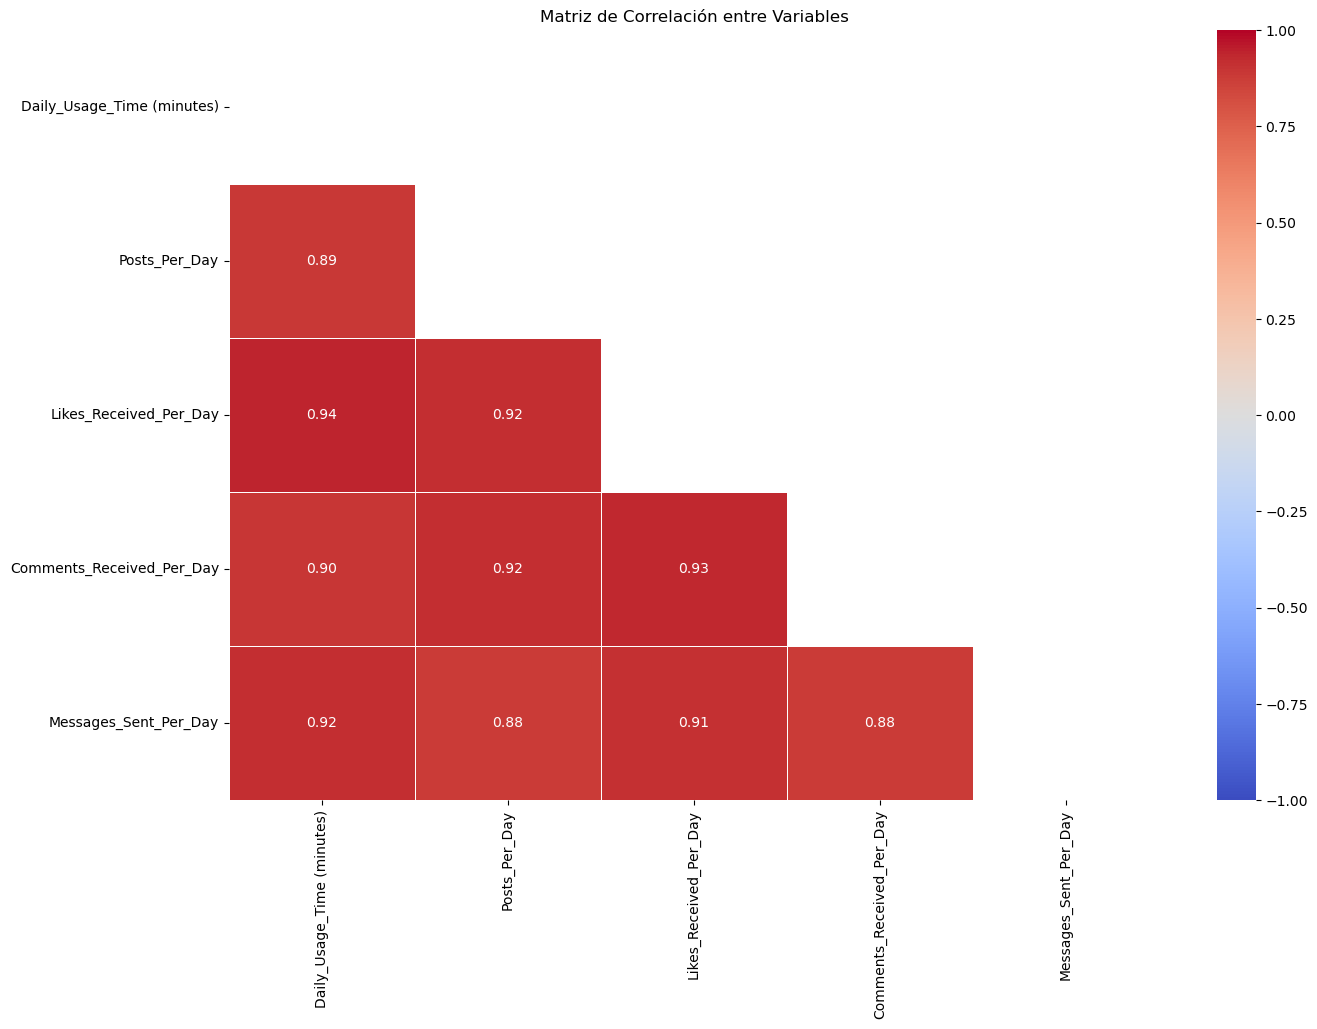

In [8]:
# Visualizamos la matriz de correlación:

plt.figure(figsize = (15, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5,vmin=-1, vmax=1, mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)))

plt.title('Matriz de Correlación entre Variables')

plt.show()

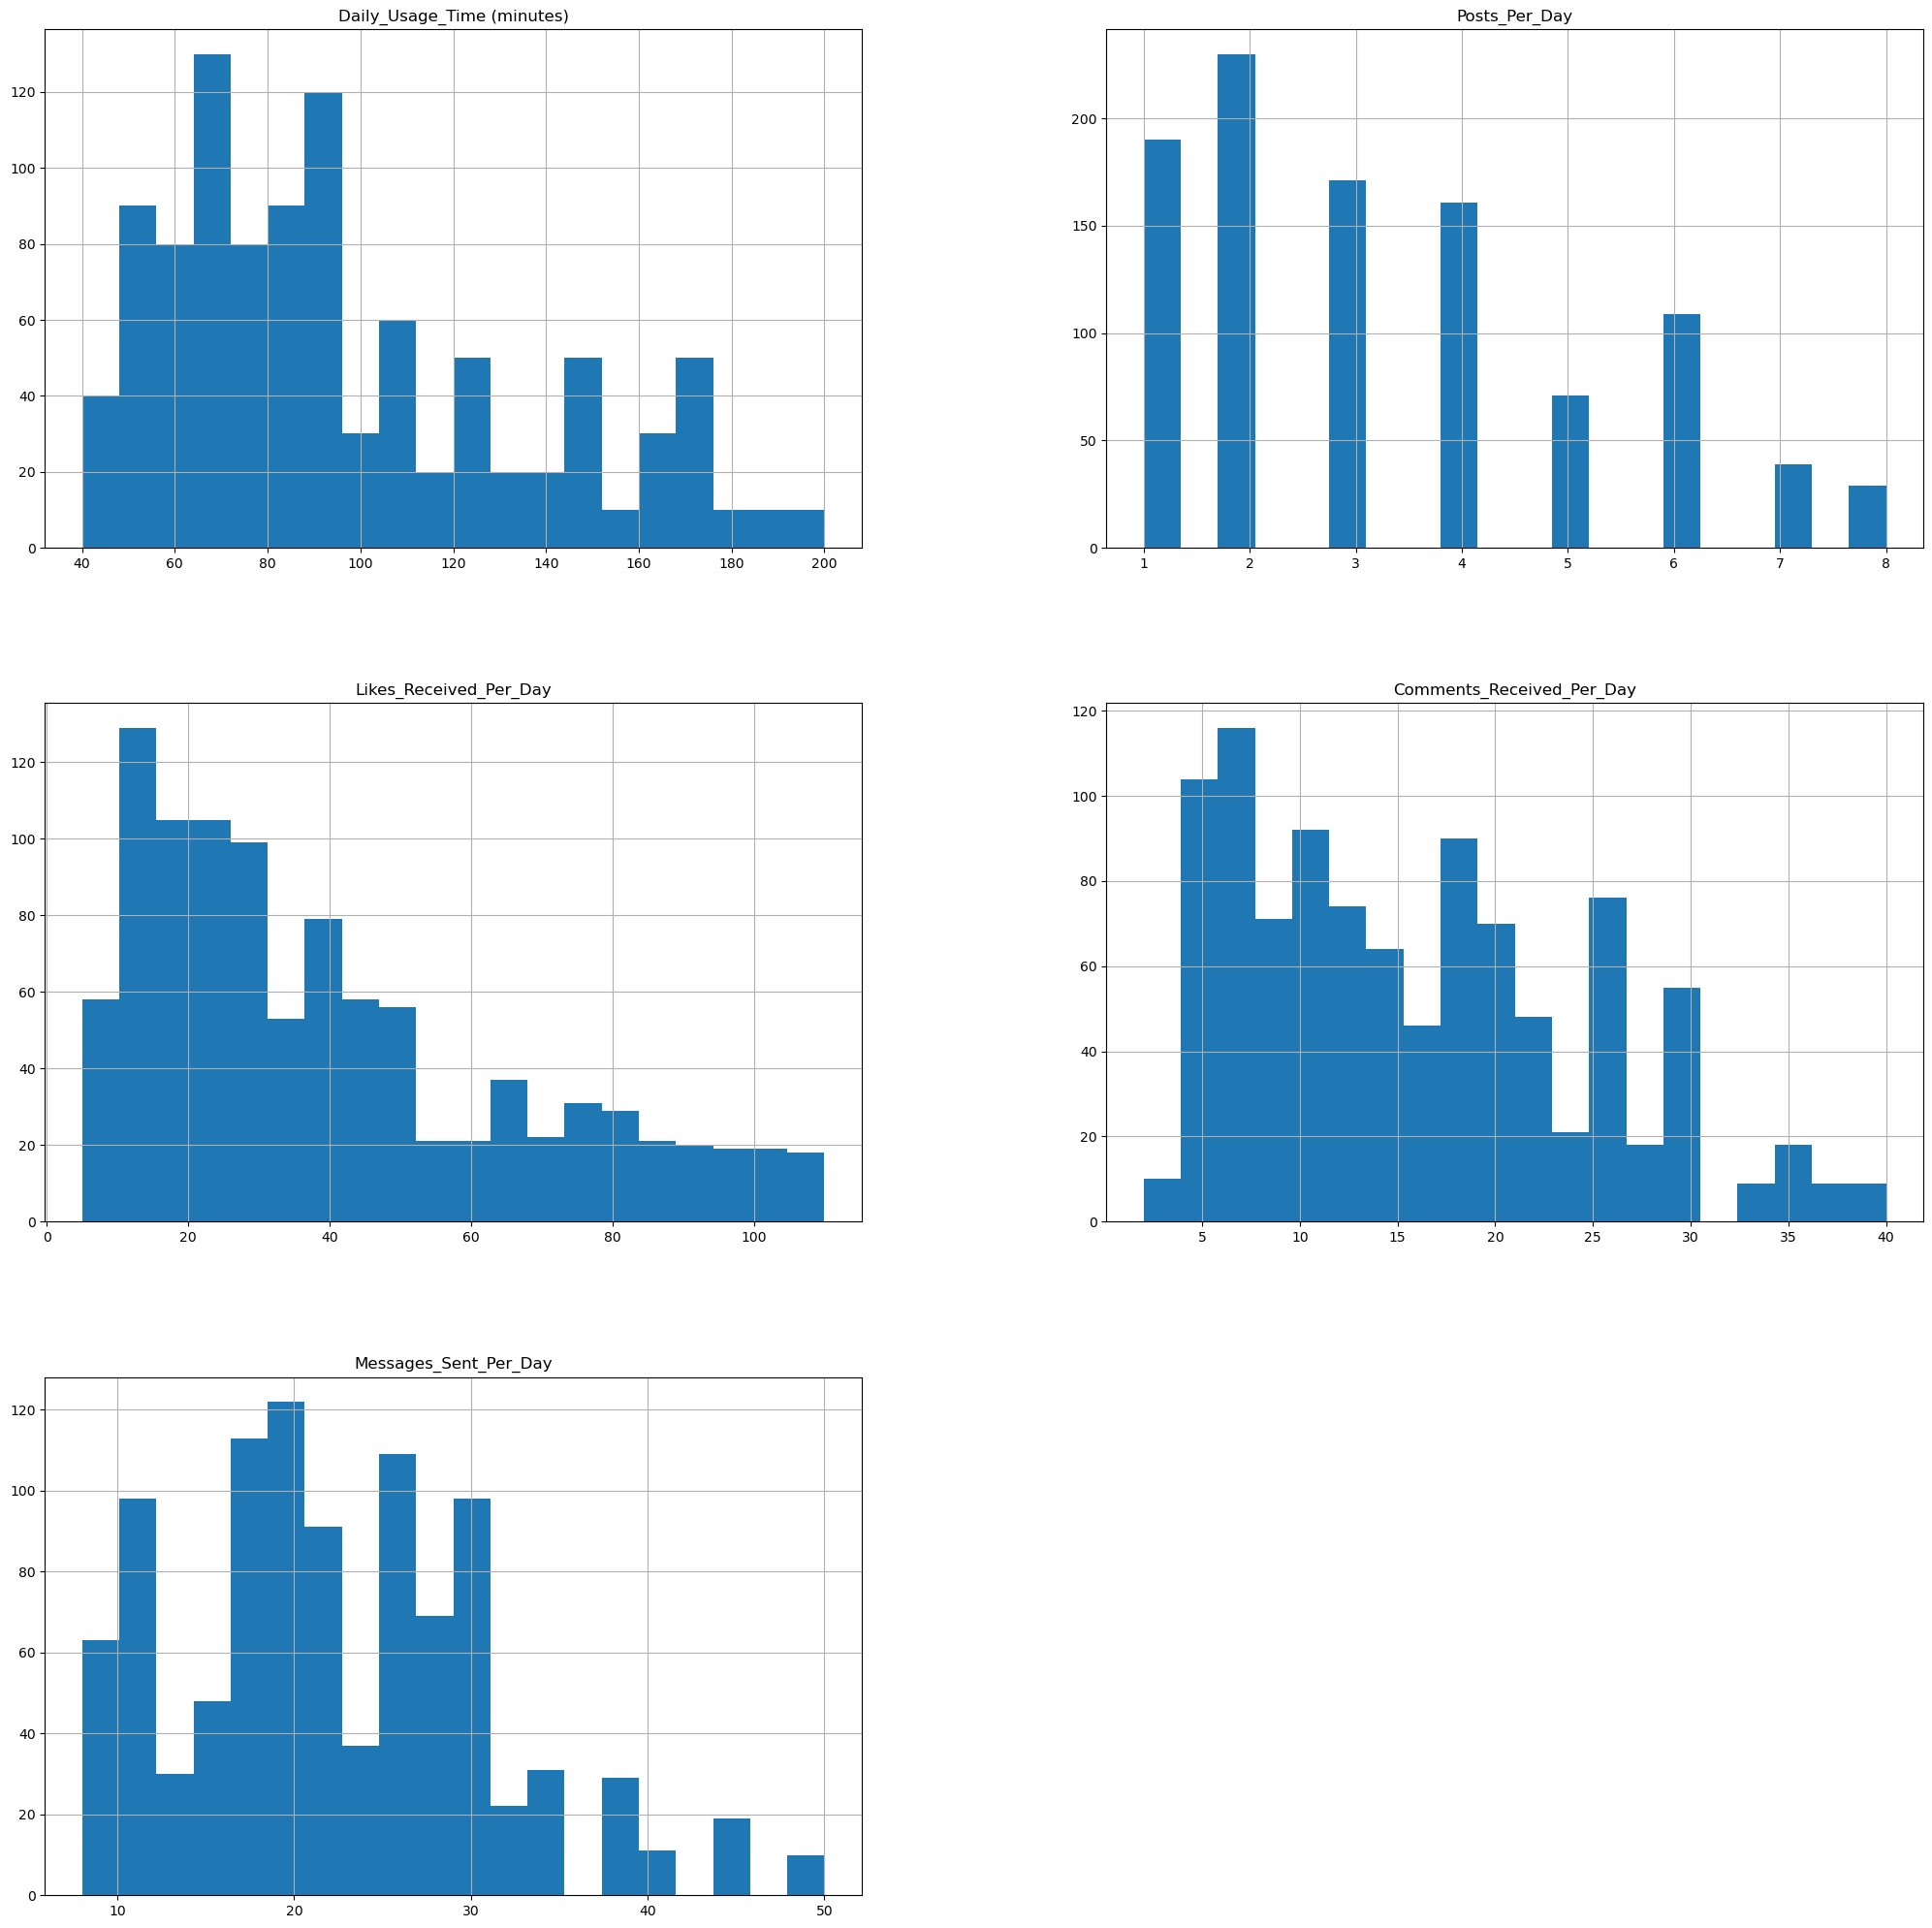

In [ ]:
# Visualizamos la distribución de nuestros datos numéricos:

df.hist(bins=20, figsize=(25,25))
plt.show()